In [8]:
import numpy as np
import cv2
import glob
import pickle

In [9]:
#prepare object points, like (0,0,0), (1,0,0), (2,0,0)..... (8,5,0)
objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

#Arrays to store object points and image points from all the images
objpoints = [] # 3d points in real world space
imgpoints = [] # 3d points in image plane

#make a list of calibration images
images = glob.glob('./calibration*.jpg')

#step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #find the chessboard corner
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    
    #if found, add object points, image points 
    if ret == True:
        print('working on ', fname)
        objpoints.append(objp)
        imgpoints.append(corners)
        
        #draw and display the corners 
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        write_name = 'corners_found'+str(idx)+'.jpg'
        cv2.imwrite(write_name, img)
        
        
#load image for reference
img = cv2.imread('./calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

#Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)


#save the camera calibration result for later use ( we don't worry about rvecs / tvecs )
dist_pickle = {}
dist_pickle['mtx'] = mtx
dist_pickle['dist'] = dist
pickle.dump(dist_pickle, open('./calibration_pickle.p', 'wb'))

working on  ./calibration6.jpg
working on  ./calibration7.jpg
working on  ./calibration3.jpg
working on  ./calibration2.jpg
working on  ./calibration20.jpg
working on  ./calibration19.jpg
working on  ./calibration18.jpg
working on  ./calibration15.jpg
working on  ./calibration14.jpg
working on  ./calibration16.jpg
working on  ./calibration17.jpg
working on  ./calibration13.jpg
working on  ./calibration12.jpg
working on  ./calibration10.jpg
working on  ./calibration11.jpg
working on  ./calibration9.jpg
working on  ./calibration8.jpg


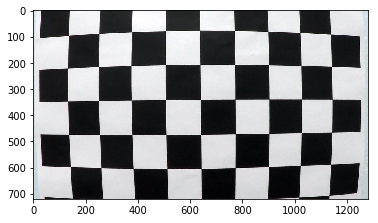

In [15]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

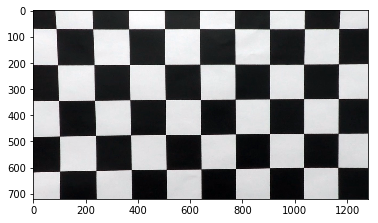

In [14]:
import matplotlib.pyplot as plt
dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(dst)
plt.show()